In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from scipy.stats import mannwhitneyu


In [24]:
# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

In [25]:
men

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


In [26]:
women

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship
...,...,...,...,...,...,...,...
4879,4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro
4880,4880,2022-07-23,France,Netherlands,1,0,UEFA Euro
4881,4881,2022-07-26,England,Sweden,4,0,UEFA Euro
4882,4882,2022-07-27,Germany,France,2,1,UEFA Euro


In [27]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

In [28]:
men_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [29]:
women_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [30]:
# Add a column to each dataset to indicate the group
men_subset["group"] = "men"
women_subset["group"] = "women"

C:\Users\mubia\AppData\Local\Temp\ipykernel_14740\2022717135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\mubia\AppData\Local\Temp\ipykernel_14740\2022717135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"


In [31]:
# Create goals_scored column
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

men_subset.head()

C:\Users\mubia\AppData\Local\Temp\ipykernel_14740\2411722164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
C:\Users\mubia\AppData\Local\Temp\ipykernel_14740\2411722164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [32]:
women_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


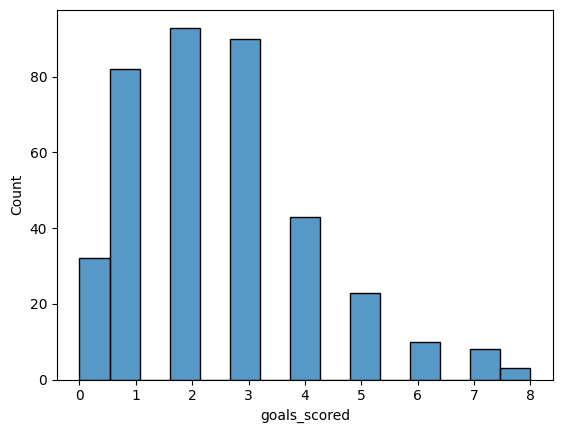

In [33]:
# Determine normality using histograms
sns.histplot(data=men_subset, x="goals_scored")
plt.show()


 Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups

In [35]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

In [36]:
both_subset_wide.head()

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0


In [37]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_test = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

In [39]:
# Extract p-value and determine hypothesis test result
p_val = results_test["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

# Result

Seeing that the p-value is lower than our significance level, this suggests that there is significant evidence to support the alternative hypothesis: the mean number of goals scored in women's international soccer matches is greater than men's.